<a href="https://colab.research.google.com/github/ABCutter/DDDS-My-Projects/blob/main/Project_3/SQL_1_Chinook_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
# Need to follow Lecture 2f: https://colab.research.google.com/drive/1rzaMrBgeuejcT-8vSv80PxyQ8oW45zWb#scrollTo=-c1RNoGnWIF6

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/)

- Zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

- [ER symbols/meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)

- [Draw IO](https://app.diagrams.net/) for creating ER diagrams, flowcharts, etc.

In [ ]:
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
from datetime import datetime

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
!sqlite3 --help
#Check to make sure it's running

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jun 25 21:24 .
drwxr-xr-x 1 root root   4096 Jun 25 21:23 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jun 25 21:24 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 24 13:38 .config
drwxr-xr-x 1 root root   4096 Jun 24 13:38 sample_data


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

### Basic Queries


#### SELECT (with * and with column names)


In [ ]:
# Select the first 10 entries from the employees table
query = '''
  select *
  from employees
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [ ]:
# Select the first 10 entries from the employees table First Names
query = '''
  select FirstName
  from employees
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,FirstName
0,Andrew
1,Nancy
2,Jane
3,Margaret
4,Steve
5,Michael
6,Robert
7,Laura


#### WHERE


In [ ]:
# Select the first 10 entries from the employees table where the first name is Robert
query = '''
  select *
  from employees
  WHERE FirstName = 'Robert'
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com


#### AND


In [ ]:
# Select the first 10 entries from the employees table where the employees are from Caldary, Canada
query = '''
  select *
  from employees
  WHERE Country = 'Canada'
  AND City = 'Calgary'
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


#### OR


In [ ]:
# Select the first 10 entries from the employees table where the employees are from Caldary or Edmonton
query = '''
  select *
  from employees
  WHERE City = 'Calgary'
  OR City = 'Edmonton'
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


#### LIKE (with % or _ wildcard)


In [ ]:
# Select the first 10 entries from the employees table where FirstName begins with 'm'
query = '''
  select *
  from employees
  WHERE FirstName
  LIKE 'm%'
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


#### BETWEEN


In [ ]:
# Select the first 10 entries from the employees table where EmployeeId is between 2 and 6
query = '''
  select *
  from employees
  WHERE EmployeeId
  BETWEEN 2 AND 6
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


#### LIMIT



In [ ]:
# Select the first 2 entries from the employees table where EmployeeId is between 2 and 6
query = '''
  select *
  from employees
  WHERE EmployeeId
  BETWEEN 2 AND 6
  limit 2
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com


### Sorting and Grouping


#### ORDER BY


In [ ]:
# Select the first 10 entries from the employees table where EmployeeId is between 2 and 6
query = '''
  select *
  from employees
  WHERE EmployeeId
  BETWEEN 2 AND 6
  ORDER BY HireDate
  Limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


#### DISTINCT


In [ ]:
# Select the first 10 entries from the employees table where EmployeeId is between 2 and 6, order results by hire date
query = '''
  select DISTINCT City
  from employees
  WHERE EmployeeId
  BETWEEN 2 AND 10
  ORDER BY HireDate
  Limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,City
0,Calgary
1,Lethbridge


#### GROUP BY



In [ ]:
# Select the first 10 entries from the employees table where EmployeeId is between 2 and 6, group by city
query = '''
  select *
  from employees
  GROUP BY City
  Limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com


### Aggregates


#### MAX


In [ ]:
# Select the max hire date from the employees table
query = '''
  select *, MAX(HireDate)
  from employees
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email,MAX(HireDate)
0,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com,2004-03-04 00:00:00


#### MIN


In [ ]:
# Select the min hire date from the employees table
query = '''
  select *, MIN(HireDate)
  from employees
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email,MIN(HireDate)
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,2002-04-01 00:00:00


In [ ]:
date_string = "2024-06-25 10:30:00"
format_string = "%Y-%m-%d %H:%M:%S"
datetime_object = datetime.strptime(date_string, format_string)
print(datetime_object)

2024-06-25 10:30:00


#### SUM


In [ ]:
# Select the albumid and title from tracks and create a sum column that sums the milliseconds of a given album
query = '''
SELECT
   tracks.albumid,
   title,
   SUM(milliseconds)
FROM
   tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
   tracks.albumid,
   title;
'''

tracks_ms = pd.read_sql_query( query , db_con)
tracks_ms

,AlbumId,Title,SUM(milliseconds)
0,1,For Those About To Rock We Salute You,2400415
1,2,Balls to the Wall,342562
2,3,Restless and Wild,858088
3,4,Let There Be Rock,2453259
4,5,Big Ones,4411709
...,...,...,...
342,343,Respighi:Pines of Rome,286741
343,344,Schubert: The Late String Quartets & String Qu...,139200
344,345,Monteverdi: L'Orfeo,66639
345,346,Mozart: Chamber Music,221331


#### AVG


In [ ]:
# Select the albumid and title from tracks and create a avg column that averages the milliseconds of a given album
query = '''
SELECT
   tracks.albumid,
   title,
   round(AVG(milliseconds)) as avg_ms
FROM
   tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
   tracks.albumid,
   title;
'''

tracks = pd.read_sql_query( query , db_con)
tracks

,AlbumId,Title,avg_ms
0,1,For Those About To Rock We Salute You,240042.0
1,2,Balls to the Wall,342562.0
2,3,Restless and Wild,286029.0
3,4,Let There Be Rock,306657.0
4,5,Big Ones,294114.0
...,...,...,...
342,343,Respighi:Pines of Rome,286741.0
343,344,Schubert: The Late String Quartets & String Qu...,139200.0
344,345,Monteverdi: L'Orfeo,66639.0
345,346,Mozart: Chamber Music,221331.0


#### COUNT



In [ ]:
%%script sqlite3 --column --header chinook.db
select count(distinct AlbumID)
from tracks

count(distinct AlbumID)
-----------------------
347                    


In [ ]:
%%script sqlite3 --column --header chinook.db
select
  t.*,
  g.*
from
  tracks as t
join
  genres as g
on
  g.GenreId = t.GenreId
limit 10

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice  GenreId  Name
-------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------  -------  ----
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99       1        Rock
2        Balls to the Wall                        2        2            1                                                                                342562        5510424   0.99       1        Rock
3        Fast As a Shark                          3        2            1        F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                     230619        3990994   0.99       1   

## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
#Bring over the plots, not all the data

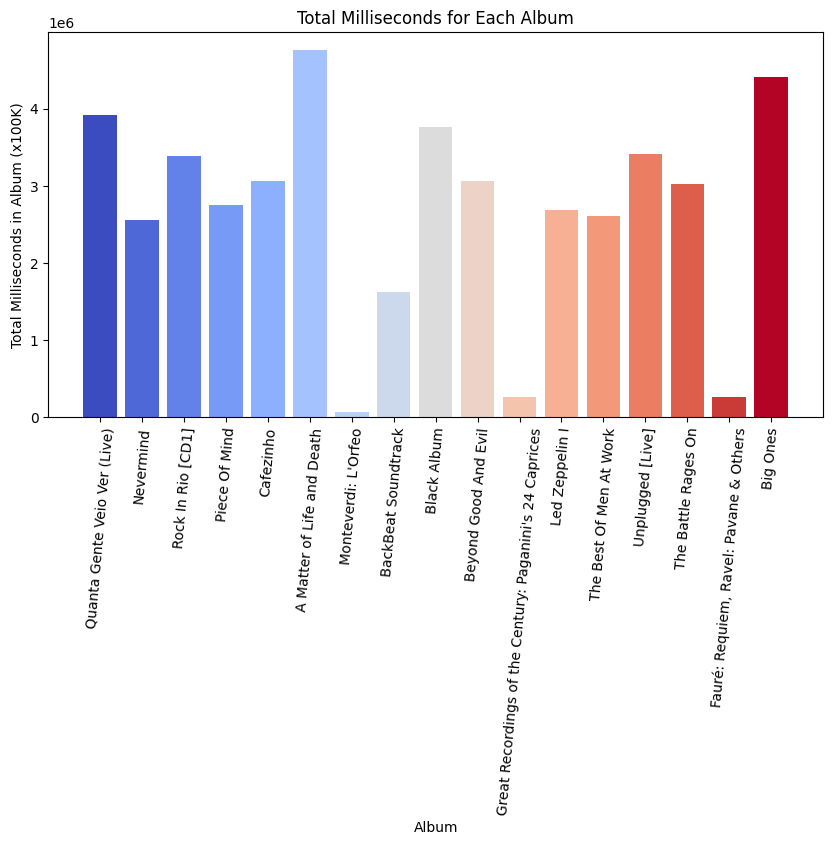

In [ ]:
# Determine the total milliseconds per album, then take a random sample (5%) of the dataframe and plot with histogram
# Select the albumid and title from tracks and create a sum column that sums the milliseconds of a given album
query = '''
SELECT
   tracks.albumid,
   title,
   SUM(milliseconds)
FROM
   tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
   tracks.albumid,
   title;
'''

tracks_ms = pd.read_sql_query( query , db_con)
tracks_ms

# Plot
plt.figure(figsize=(10, 5))

# Create a color palette with a unique color for each album plotted
sampled_df = tracks_ms.sample(frac=0.05, random_state=1)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(sampled_df)))

# Create the bar chart with different colors for each album
plt.bar(sampled_df['Title'], sampled_df['SUM(milliseconds)'], color = colors)
plt.title('Total Milliseconds for Each Album')
plt.xlabel('Album')
plt.ylabel('Total Milliseconds in Album (x100K)')
plt.xticks(rotation=85) #make album names readable via rotation
plt.show()

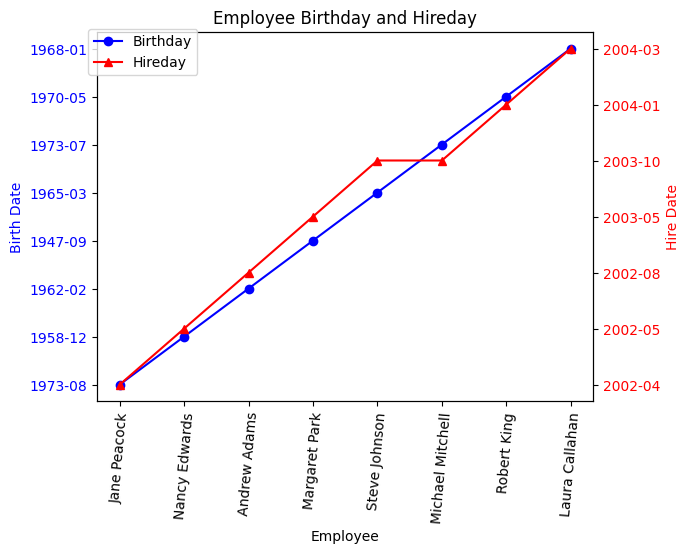

In [ ]:
# Select the first 10 entries from the employees table where EmployeeId is between 2 and 6, order results by hire date
query = '''
  select emp.FirstName, emp.LastName, strftime('%Y-%m', emp.Birthdate) AS bday, strftime('%Y-%m', emp.HireDate) AS hday
  from employees as emp
  ORDER BY HireDate
'''

employees_hd = pd.read_sql_query( query , db_con)
employees_hd

# Create the first plot and y-axis (left side)
fig, ax1 = plt.subplots()

ax1.plot(employees_hd['FirstName'] + ' ' + employees_hd['LastName'], employees_hd['bday'], 'b-o', label='Birthday')
ax1.set_xlabel('Employee')
ax1.set_ylabel('Birth Date', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis (right side) sharing the same x-axis
ax2 = ax1.twinx()

ax2.plot(employees_hd['FirstName'] + ' ' + employees_hd['LastName'], employees_hd['hday'], 'r-^', label='Hireday')
ax2.set_ylabel('Hire Date', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Employee Birthday and Hireday')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Adjust legend position
ax1.tick_params(axis='x', rotation=85) #make names readable via rotation
plt.show()

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data
